In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem

In [49]:
# ! dir

In [50]:
# Read csv file
cov19_vax_us_df = pd.read_csv('../data/covid19_vaccinations_in_us.csv')


In [51]:
cov19_vax_us_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,United States,984444295,296511.0,381249.0,676728782,203829.0,607682588,235339.0,270227181,81.4,...,56352709,18.0,54974636,19.4,52996306,20.5,23699191,43.3,1997664.0,57512608.0
1,Alaska,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,73.2,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
2,Alabama,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,65.1,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
3,Arkansas,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,70.1,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
4,American Samoa,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,95.0,...,576,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN


In [52]:
cov19_vax_us_df.tail()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
59,Vermont,2588940,414902.0,507651.0,1762563,282467.0,1563668,306611.0,623937,95.0,...,213211,35.8,206110,37.4,196740,38.6,86640,69.3,NaN,NaN
60,Washington,25606455,336268.0,430228.0,17723480,232748.0,15765601,264887.0,6517326,85.6,...,1977241,27.6,1907183,29.3,1828199,30.7,720971,59.6,NaN,NaN
61,Wisconsin,16474175,282943.0,361606.0,12444016,213725.0,11264241,247249.0,4386970,75.3,...,1330586,24.2,1298038,26.0,1251270,27.5,600688,59.1,NaN,NaN
62,West Virginia,5515855,307779.0,385029.0,3098571,172897.0,2896775,202207.0,1212338,67.6,...,210085,12.4,208143,13.4,204380,14.3,115583,31.5,NaN,NaN
63,Wyoming,1281755,221466.0,288019.0,854132,147580.0,790769,177691.0,353727,61.1,...,65920,12.1,64919,13.2,63244,14.2,34832,35.1,NaN,NaN


In [53]:
cov19_vax_us_df.shape

(64, 63)

In [54]:
cov19_vax_us_df.columns

Index(['Jurisdiction (State/Territory) or Federal Entity',
       'Total doses distributed', 'Doses distributed per 100k pop',
       'Doses distributed by jurisdiction per 100k of 18+ pop',
       'Total doses administered by jurisdiction',
       'Doses administered by jurisdiction per 100k pop',
       'Doses administered by jurisdiction to 18+ pop',
       'Doses administered by jurisdiction per 100k of 18+ pop',
       'Residents with at least one dose',
       'Percent of total pop with at least one dose',
       'Residents 18+ with at least one dose',
       'Percent of 18+ pop with at least one dose',
       'Residents with a completed primary series',
       'Percent of total pop with a completed primary series',
       'Residents 18+ with a completed primary series',
       'Percent of 18+ pop with a completed primary series',
       'Total number of original Pfizer doses distributed',
       'Total number of Pfizer updated booster doses distributed',
       'Total number of 

In [55]:
cov19_vax_us_df.dtypes

Jurisdiction (State/Territory) or Federal Entity                  object
Total doses distributed                                            int64
Doses distributed per 100k pop                                   float64
Doses distributed by jurisdiction per 100k of 18+ pop            float64
Total doses administered by jurisdiction                           int64
                                                                  ...   
Percent of 18+ pop with an updated (bivalent) booster dose       float64
Residents 65+ with an updated (bivalent) booster dose              int64
Percent of 65+ pop with an updated (bivalent) booster dose       float64
Children <5 with at least one dose                               float64
Total number of updated (bivalent) booster doses administered    float64
Length: 63, dtype: object

In [56]:
cov19_vax_us_df.duplicated().sum()

0

In [57]:
cov19_vax_us_df["Jurisdiction (State/Territory) or Federal Entity"].unique()

array(['United States', 'Alaska', 'Alabama', 'Arkansas', 'American Samoa',
       'Arizona', 'Bureau of Prisons', 'California', 'Colorado',
       'Connecticut', 'District of Columbia', 'Dept of Defense',
       'Delaware', 'Florida', 'Federated States of Micronesia', 'Georgia',
       'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Indian Health Svc', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Marshall Islands', 'Michigan', 'Minnesota',
       'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana',
       'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York State', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Republic of Palau', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Veterans Health', 'Virgin Islands', 'Vermont', 'Washington',
       'Wisconsin', 'West Virgin

In [58]:
# only columns we want to analysize
cols = ['Jurisdiction (State/Territory) or Federal Entity', 'Total doses distributed', 'Total doses administered by jurisdiction', 
                                      'Residents with at least one dose', 'Percent of total pop with at least one dose', 'Residents with at least one dose',                                     'Percent of total pop with at least one dose', 'Residents 18+ with a completed primary series',
                                      'Percent of 18+ pop with a completed primary series', 'Residents 65+ with at least one dose', 'Percent of 65+ pop with at least one dose', 
                                      'Residents 65+ with a completed primary series', 'Percent of 65+ pop with a completed primary series', 'Residents 12+ with at least one dose',
                                      'Percent of 12+ pop with at least one dose', 'Residents 12+ with a completed primary series', 'Percent of 12+ pop with a completed primary series',
                                      'Residents 5+ with at least one dose', 'Percent of 5+ pop with at least one dose', 'Residents 5+ with a completed primary series',
                                      'Percent of 5+ pop with a completed primary series', 'Children <5 with at least one dose']

col_cov19_vax_us_df = cov19_vax_us_df[cols]
# total_doses_us.loc[:, 'Total doses distributed'] = total_doses_us['Total doses distributed'].map('{:,d}'.format)
# col_cov19_vax_us_df.map('{:,d}'.format)
col_cov19_vax_us_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Percent of 18+ pop with a completed primary series,Residents 65+ with at least one dose,...,Percent of 65+ pop with a completed primary series,Residents 12+ with at least one dose,Percent of 12+ pop with at least one dose,Residents 12+ with a completed primary series,Percent of 12+ pop with a completed primary series,Residents 5+ with at least one dose,Percent of 5+ pop with at least one dose,Residents 5+ with a completed primary series,Percent of 5+ pop with a completed primary series,Children <5 with at least one dose
0,United States,984444295,676728782,270227181,81.4,270227181,81.4,204327579,79.1,58758542,...,94.4,256511884,90.5,219966681,77.6,268021871,85.8,229426936,73.5,1997664.0
1,Alaska,2176065,1328221,535718,73.2,535718,73.2,418608,75.9,90909,...,89.5,504958,82.9,452885,74.4,530318,77.9,474707,69.8,NaN
2,Alabama,12349530,7018011,3193141,65.1,3193141,65.1,2416344,63.3,840073,...,85.3,3107922,74.2,2554026,61.0,3183544,69.1,2607644,56.6,NaN
3,Arkansas,8373210,4874091,2115165,70.1,2115165,70.1,1547724,66.8,524198,...,84.2,2031772,79.5,1661645,65.0,2104099,74.4,1715538,60.6,NaN
4,American Samoa,128480,115281,46226,95.0,46226,95.0,29952,95.0,3314,...,91.4,39595,95.0,36395,95.0,46202,95.0,42494,95.0,NaN


In [59]:
col_cov19_vax_us_df.dtypes

Jurisdiction (State/Territory) or Federal Entity       object
Total doses distributed                                 int64
Total doses administered by jurisdiction                int64
Residents with at least one dose                        int64
Percent of total pop with at least one dose           float64
Residents with at least one dose                        int64
Percent of total pop with at least one dose           float64
Residents 18+ with a completed primary series           int64
Percent of 18+ pop with a completed primary series    float64
Residents 65+ with at least one dose                    int64
Percent of 65+ pop with at least one dose             float64
Residents 65+ with a completed primary series           int64
Percent of 65+ pop with a completed primary series    float64
Residents 12+ with at least one dose                    int64
Percent of 12+ pop with at least one dose             float64
Residents 12+ with a completed primary series           int64
Percent 

In [69]:
#drop first index for states and territories only
st_ter_df = col_cov19_vax_us_df.drop(0, axis=0)
st_ter_df

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Percent of 18+ pop with a completed primary series,Residents 65+ with at least one dose,...,Percent of 65+ pop with a completed primary series,Residents 12+ with at least one dose,Percent of 12+ pop with at least one dose,Residents 12+ with a completed primary series,Percent of 12+ pop with a completed primary series,Residents 5+ with at least one dose,Percent of 5+ pop with at least one dose,Residents 5+ with a completed primary series,Percent of 5+ pop with a completed primary series,Children <5 with at least one dose
1,Alaska,2176065,1328221,535718,73.2,535718,73.2,418608,75.9,90909,...,89.5,504958,82.9,452885,74.4,530318,77.9,474707,69.8,NaN
2,Alabama,12349530,7018011,3193141,65.1,3193141,65.1,2416344,63.3,840073,...,85.3,3107922,74.2,2554026,61.0,3183544,69.1,2607644,56.6,NaN
3,Arkansas,8373210,4874091,2115165,70.1,2115165,70.1,1547724,66.8,524198,...,84.2,2031772,79.5,1661645,65.0,2104099,74.4,1715538,60.6,NaN
4,American Samoa,128480,115281,46226,95.0,46226,95.0,29952,95.0,3314,...,91.4,39595,95.0,36395,95.0,46202,95.0,42494,95.0,NaN
5,Arizona,19959120,14647405,5704677,78.4,5704677,78.4,4239941,75.2,1348446,...,90.8,5394242,86.9,4596164,74.1,5663049,82.7,4805903,70.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Vermont,2588940,1762563,623937,95.0,623937,95.0,467865,91.7,151804,...,95.0,582633,95.0,502332,91.2,614499,95.0,531036,89.3,NaN
60,Washington,25606455,17723480,6517326,85.6,6517326,85.6,5095049,85.6,1298687,...,95.0,6122611,94.2,5484930,84.4,6428635,89.8,5755895,80.4,NaN
61,Wisconsin,16474175,12444016,4386970,75.3,4386970,75.3,3539130,77.7,1081267,...,95.0,4156988,83.1,3789458,75.8,4341550,79.1,3954892,72.0,NaN
62,West Virginia,5515855,3098571,1212338,67.6,1212338,67.6,989169,69.0,354072,...,87.7,1178037,75.6,1045058,67.1,1208323,71.1,1069264,62.9,NaN


In [60]:
# #format rows to have commas for better readability 
# ################# this is only working if i RUN-ALL ever time
# col_cov19_vax_us_df.loc[:, 'Total doses distributed'] = col_cov19_vax_us_df['Total doses distributed'].map('{:,d}'.format)
# col_cov19_vax_us_df.loc[:, 'Total doses administered by jurisdiction'] = col_cov19_vax_us_df['Total doses administered by jurisdiction'].map('{:,d}'.format)

# # col_cov19_vax_us_df.loc[:, 'Residents with at least one dose'] = col_cov19_vax_us_df['Residents with at least one dose'].map('{:,d}'.format)
# col_cov19_vax_us_df.loc[:, 'Residents 18+ with a completed primary series'] = col_cov19_vax_us_df['Residents 18+ with a completed primary series'].map('{:,d}'.format)
# ########################## Residents 18+ with at least one dose === Residents with at least one dose 
# # ?????????????????????????????????????????????????????????????????????????????????

# col_cov19_vax_us_df.loc[:, 'Residents 65+ with at least one dose'] = col_cov19_vax_us_df['Residents 65+ with at least one dose'].map('{:,d}'.format)
# col_cov19_vax_us_df.loc[:, 'Residents 65+ with a completed primary series'] = col_cov19_vax_us_df['Residents 65+ with a completed primary series'].map('{:,d}'.format)

# col_cov19_vax_us_df.loc[:, 'Residents 12+ with at least one dose'] = col_cov19_vax_us_df['Residents 12+ with at least one dose'].map('{:,d}'.format)
# col_cov19_vax_us_df.loc[:, 'Residents 12+ with a completed primary series'] = col_cov19_vax_us_df['Residents 12+ with a completed primary series'].map('{:,d}'.format)

# # col_cov19_vax_us_df.loc[:, 'Residents 5+ with at least one dose '] = col_cov19_vax_us_df['Residents 5+ with at least one dose '].map('{:,d}'.format)
# col_cov19_vax_us_df.loc[:, 'Residents 5+ with a completed primary series'] = col_cov19_vax_us_df['Residents 5+ with a completed primary series'].map('{:,d}'.format)
# ########################## Residents 5+ with at least one dose CHECK DF
# ?????????????????????????????????????????????????????????????????????????????????


In [61]:
# total doses distrubuted in US/ dose per jusidiction
total_doses_us = col_cov19_vax_us_df[["Jurisdiction (State/Territory) or Federal Entity",'Total doses distributed', 'Total doses administered by jurisdiction' ]]
total_doses_us.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Total doses administered by jurisdiction
0,United States,984444295,676728782
1,Alaska,2176065,1328221
2,Alabama,12349530,7018011
3,Arkansas,8373210,4874091
4,American Samoa,128480,115281


Text(0.5, 1.0, 'Total doses distributed per Jusidiction')

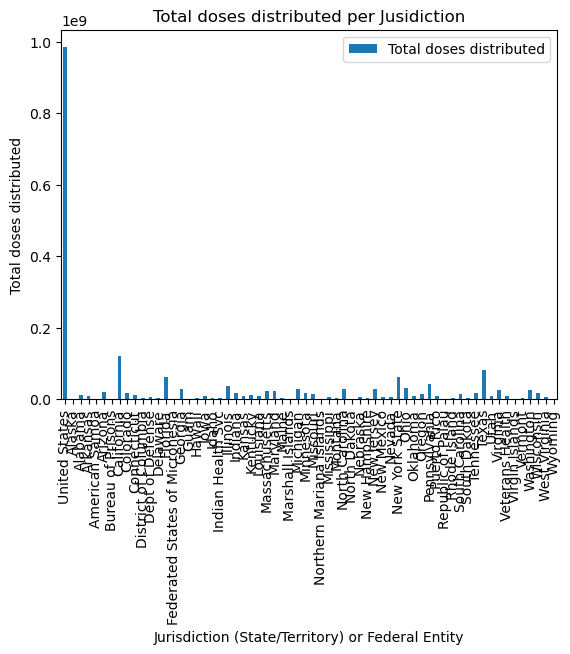

In [67]:
# bar chart of total doses/jurisdiciton
total_doses_us.plot(kind = 'bar', x = 'Jurisdiction (State/Territory) or Federal Entity', y = 'Total doses distributed')
plt.xlabel('Jurisdiction (State/Territory) or Federal Entity')
plt.ylabel('Total doses distributed')
plt.title('Total doses distributed per Jusidiction')

Text(0.5, 1.0, 'Total doses distributed per Jusidiction')

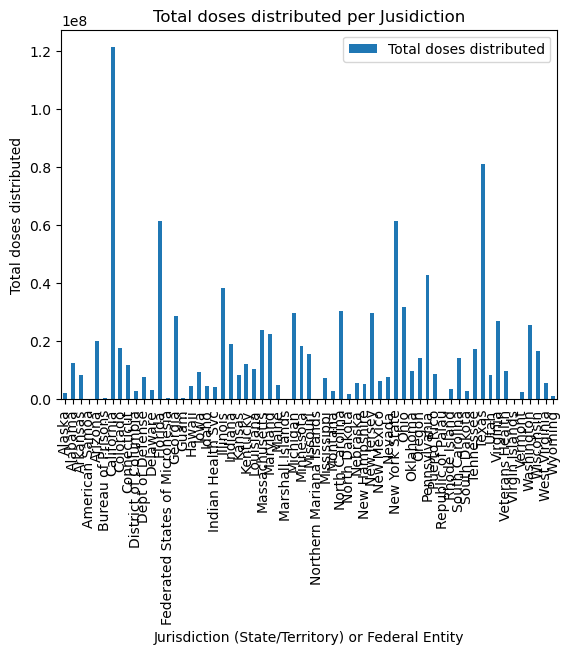

In [71]:
# bar chart of total doses/jurisdiciton for state / terr only
st_ter_df.plot(kind = 'bar', x = 'Jurisdiction (State/Territory) or Federal Entity', y = 'Total doses distributed')
plt.xlabel('Jurisdiction (State/Territory) or Federal Entity')
plt.ylabel('Total doses distributed')
plt.title('Total doses distributed per Jusidiction')

In [70]:
# 65+ residents df of states/terr only
sixfive_plus_df = st_ter_df[["Jurisdiction (State/Territory) or Federal Entity", 'Total doses distributed',
                                       'Residents 65+ with at least one dose', 'Residents 65+ with a completed primary series']]
sixfive_plus_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Residents 65+ with at least one dose,Residents 65+ with a completed primary series
1,Alaska,2176065,90909,81999
2,Alabama,12349530,840073,725159
3,Arkansas,8373210,524198,440981
4,American Samoa,128480,3314,2996
5,Arizona,19959120,1348446,1188267


Text(0.5, 1.0, 'Total doses distributed per Jusidiction')

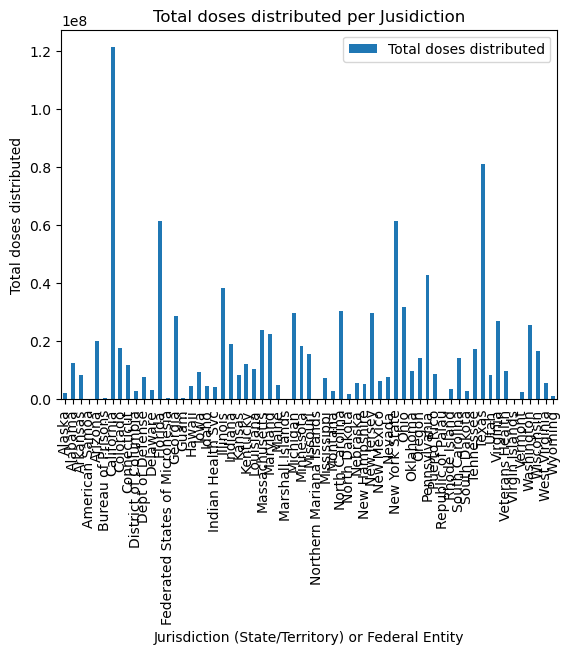

In [72]:
# bar chart of 65+ jurisdiciton
sixfive_plus_df.plot(kind = 'bar', x = 'Jurisdiction (State/Territory) or Federal Entity', y = 'Total doses distributed')
plt.xlabel('Jurisdiction (State/Territory) or Federal Entity')
plt.ylabel('Total doses distributed')
plt.title('Total doses distributed per Jusidiction')

In [64]:
# 18+ residents df
#???????????????????????????????????????????????????????????

In [73]:
# 12+ residents df stats
twelve_plus_df = st_ter_df[["Jurisdiction (State/Territory) or Federal Entity", 'Total doses distributed',
                                      'Residents 12+ with at least one dose', "Residents 12+ with a completed primary series" ]]
twelve_plus_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Residents 12+ with at least one dose,Residents 12+ with a completed primary series
1,Alaska,2176065,504958,452885
2,Alabama,12349530,3107922,2554026
3,Arkansas,8373210,2031772,1661645
4,American Samoa,128480,39595,36395
5,Arizona,19959120,5394242,4596164


In [74]:
# 5+ residents df states
five_plus_df = st_ter_df[["Jurisdiction (State/Territory) or Federal Entity", 'Total doses distributed',
                                    'Residents 5+ with at least one dose', "Residents 5+ with a completed primary series" ]]
five_plus_df.head()


,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Residents 5+ with at least one dose,Residents 5+ with a completed primary series
1,Alaska,2176065,530318,474707
2,Alabama,12349530,3183544,2607644
3,Arkansas,8373210,2104099,1715538
4,American Samoa,128480,46202,42494
5,Arizona,19959120,5663049,4805903
